In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import numpy as np

from math import pi as PI
from math import exp as exp



def analytical_solution(NT, NX, TMAX, XMAX, NU):
   """
   Returns the velocity field and distance for the analytical solution
   """

   # Increments
   DT = TMAX/(NT-1)
   DX = XMAX/(NX-1)

   # Initialise data structures
   import numpy as np
   u_analytical = np.zeros((NX,NT))
   x = np.zeros(NX)
   t = np.zeros(NT)

   # Distance
   for i in range(0,NX):
       x[i] = i*DX

   # Analytical Solution
   for n in range(0,NT):
       t = n*DT

       for i in range(0,NX):
           phi = exp( -(x[i]-4*t)**2/(4*NU*(t+1)) ) + exp( -(x[i]-4*t-2*PI)**2/(4*NU*(t+1)) )

           dphi = ( -0.5*(x[i]-4*t)/(NU*(t+1))*exp( -(x[i]-4*t)**2/(4*NU*(t+1)) )
               -0.5*(x[i]-4*t-2*PI)/(NU*(t+1))*exp( -(x[i]-4*t-2*PI)**2/(4*NU*(t+1)) ) )

           u_analytical[i,n] = -2*NU*(dphi/phi) + 4

   return u_analytical, x

def convection_diffusion(NT, NX, TMAX, XMAX, NU):
   """
   Returns the velocity field and distance for 1D non-linear convection-diffusion
   """

   # Increments
   DT = TMAX/(NT-1)
   DX = XMAX/(NX-1)

   # Initialise data structures
   import numpy as np
   u = np.zeros((NX,NT))
   u_analytical = np.zeros((NX,NT))
   x = np.zeros(NX)
   t = np.zeros(NT)
   ipos = np.zeros(NX)
   ineg = np.zeros(NX)

   # Periodic boundary conditions
   for i in range(0,NX):
       x[i] = i*DX
       ipos[i] = i+1
       ineg[i] = i-1

   ipos[NX-1] = 0
   ineg[0] = NX-1

   # Initial conditions
   for i in range(0,NX):
       phi = exp( -(x[i]**2)/(4*NU) ) + exp( -(x[i]-2*PI)**2 / (4*NU) )
       dphi = -(0.5*x[i]/NU)*exp( -(x[i]**2) / (4*NU) ) - (0.5*(x[i]-2*PI) / NU )*exp(-(x[i]-2*PI)**2 / (4*NU) )
       u[i,0] = -2*NU*(dphi/phi) + 4

   # Numerical solution
   for n in range(0,NT-1):
       for i in range(0,NX):
           u[i,n+1] = (u[i,n]-u[i,n]*(DT/DX)*(u[i,n]-u[int(ineg[i]),n])+NU*(DT/DX**2)*(u[int(ipos[i]),n]-2*u[i,n]+u[int(ineg[i]),n]))

   return u, x

def plot_diffusion(u_analytical,u,x,NT,TITLE):
   """
   Plots the 1D velocity field
   """

   import matplotlib.pyplot as plt
   import matplotlib.cm as cm
   plt.figure(figsize=(12,8))
   ax=plt.subplot(111)
   colour=iter(cm.rainbow(np.linspace(0,20,NT)))
   for n in range(0,NT,20):
      c=next(colour)
      ax.plot(x,u[:,n], markerfacecolor='none', alpha=0.5, label='i='+str(n)+' numerical')
      ax.plot(x,u_analytical[:,n],linestyle='-',c=c,label='i='+str(n)+' analytical')
   box=ax.get_position()
   ax.set_position([box.x0, box.y0, box.width*0.7,box.height])
   ax.legend( bbox_to_anchor=(1.02,1), loc=2)
   plt.xlabel('x (radians)')
   plt.ylabel('u (m/s)')
   plt.ylim([0,8.0])
   plt.xlim([0,2.0*PI])
#    plt.savefig('results/burgers_static.jpg')
   plt.show()

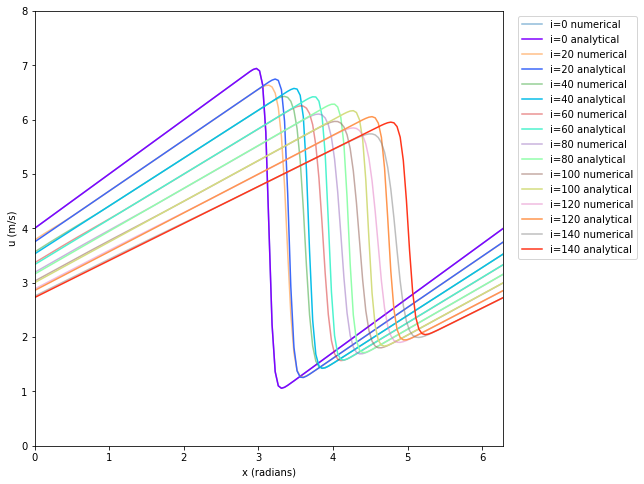

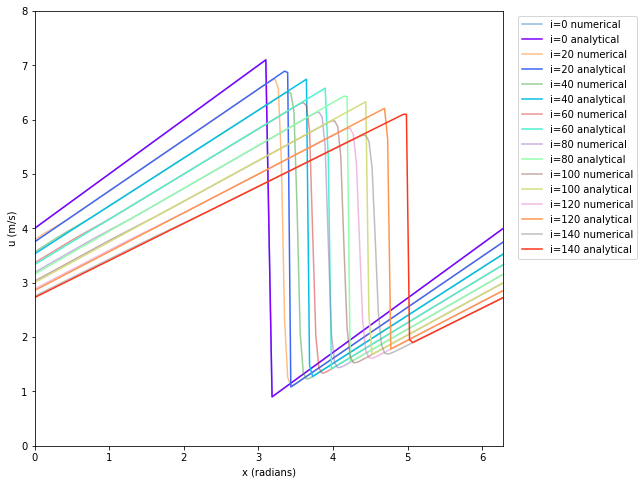

In [3]:
u,x = convection_diffusion(151, 151, 0.5, 2.0*PI, 0.1)
u_analytical,x = analytical_solution(151, 151, 0.5, 2.0*PI, 0.1)
plot_diffusion(u_analytical,u,x,151,'')

u,x = convection_diffusion(151, 151, 0.5, 2.0*PI, 0.01)
u_analytical,x = analytical_solution(151, 151, 0.5, 2.0*PI, 0.01)
plot_diffusion(u_analytical,u,x,151,'')